In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *
set_width_max_of_jupyterpad()

    
def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)
def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

Welcome to JupyROOT 6.14/04


 parallel baseline scan board,  0203


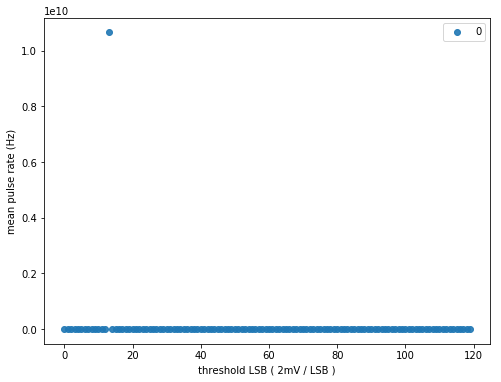

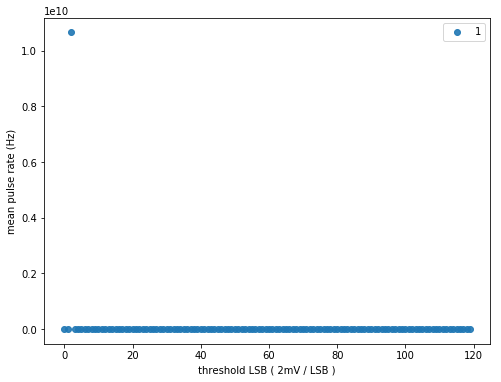

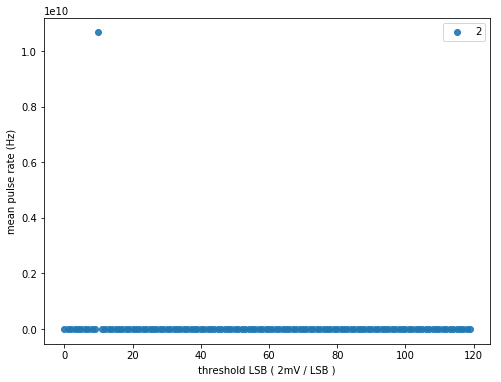

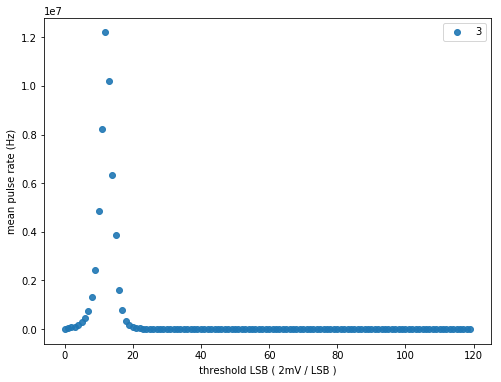

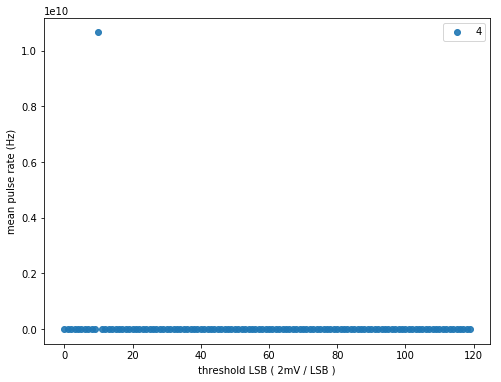

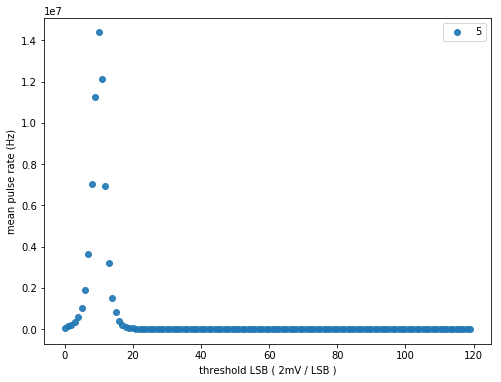

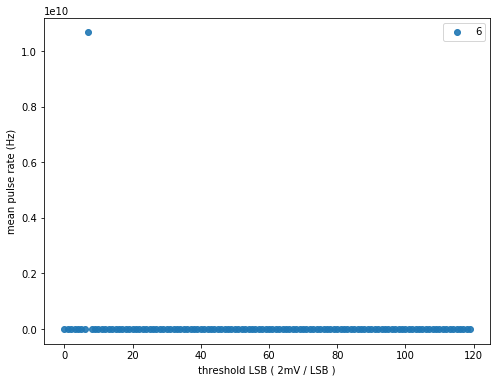

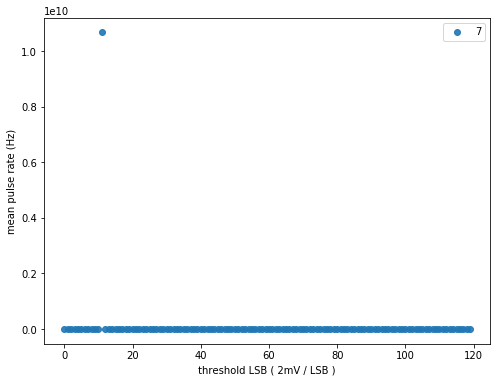

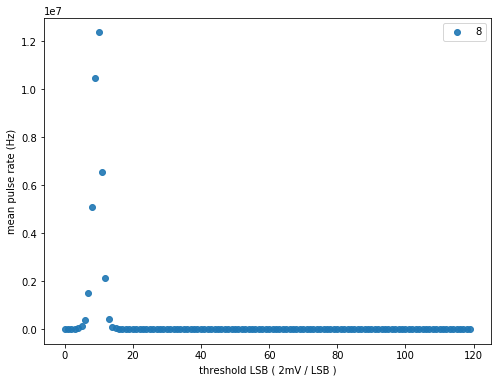

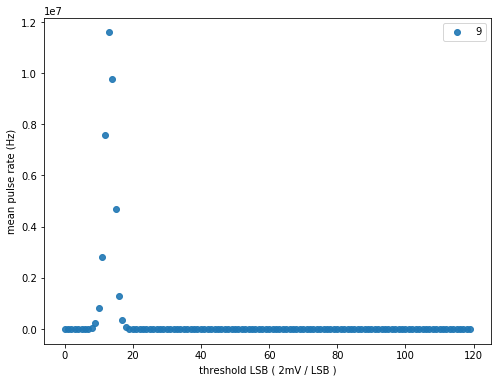

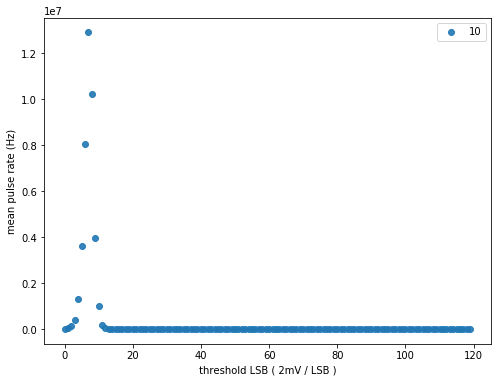

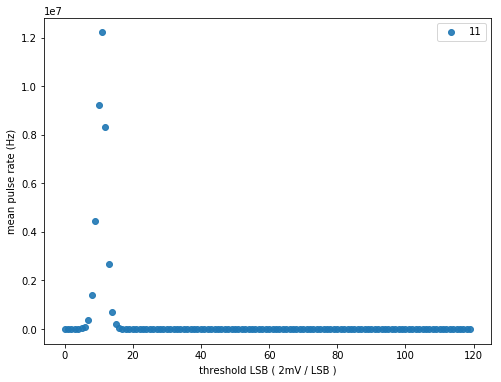

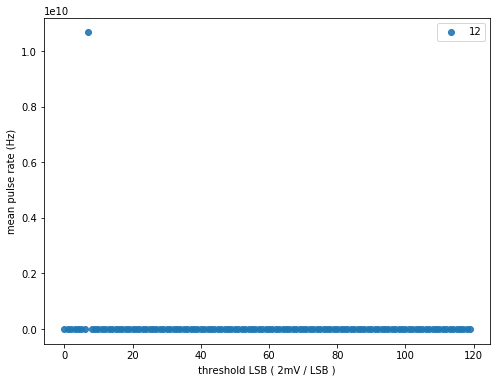

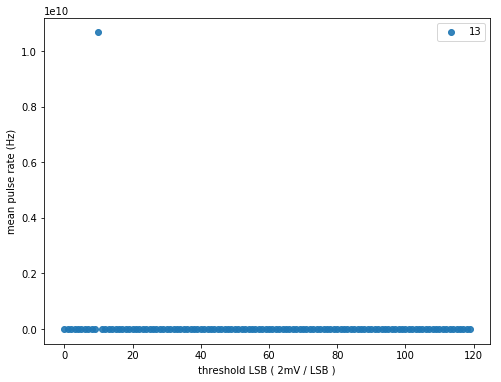

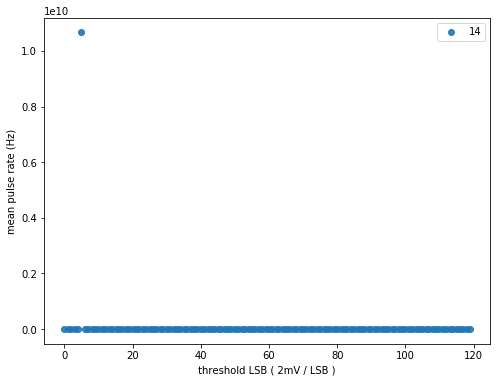

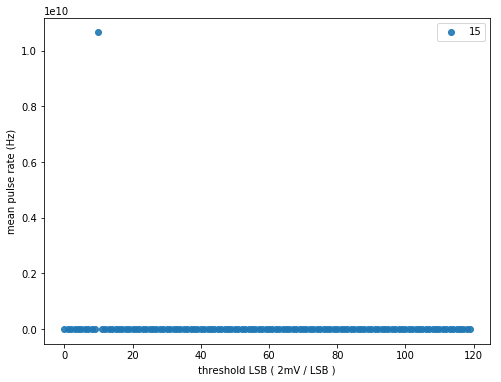

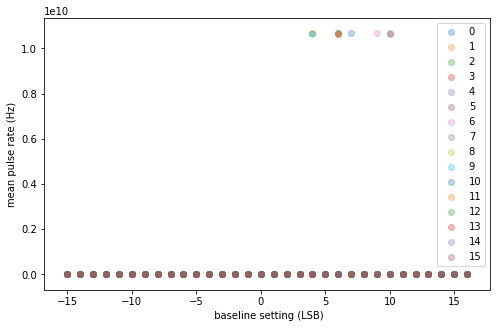

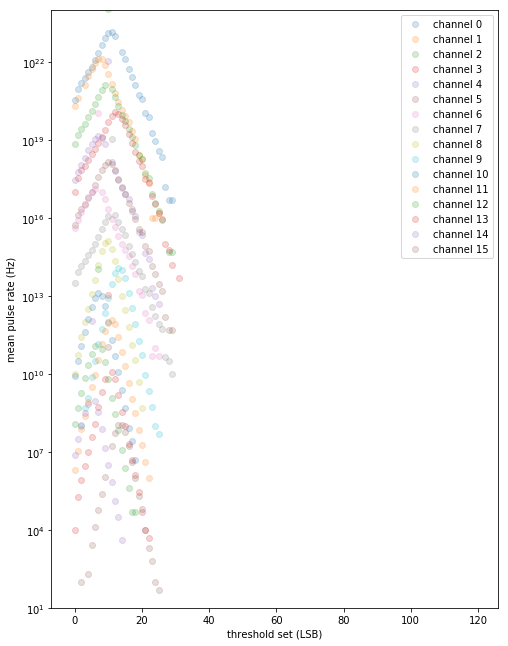

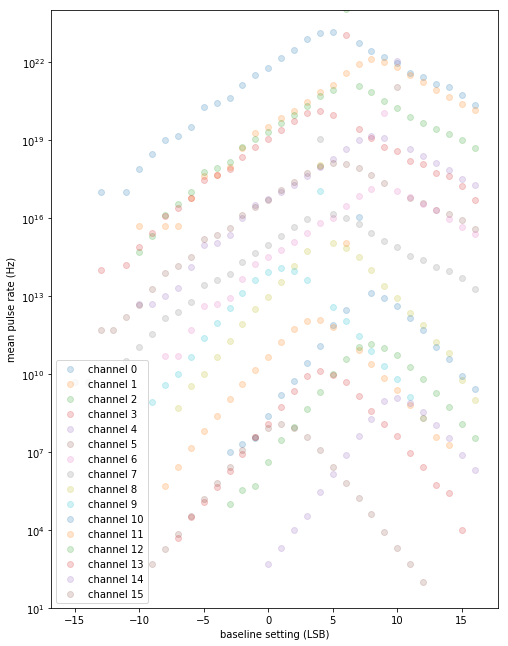

 parallel baseline scan board,  0204


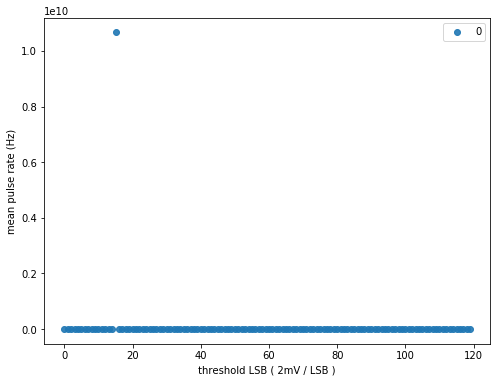

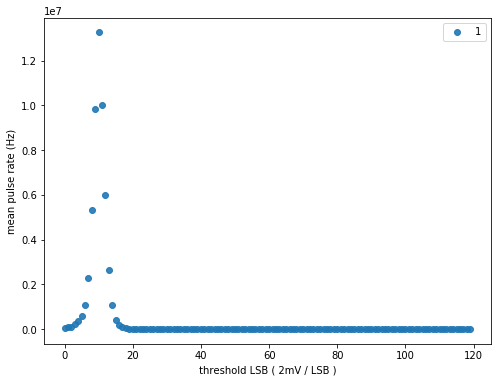

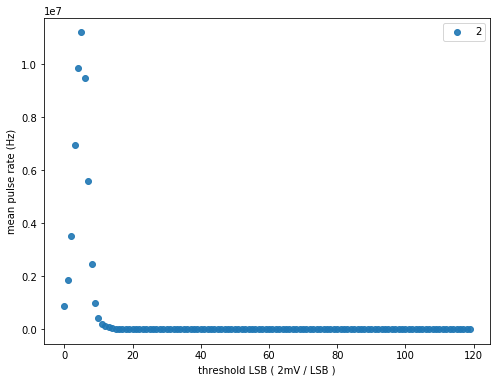

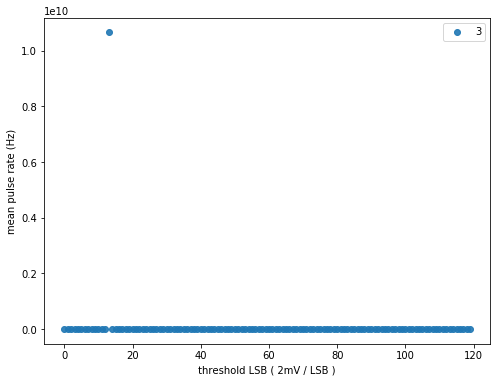

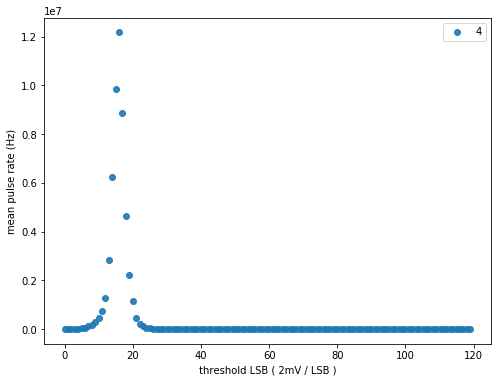

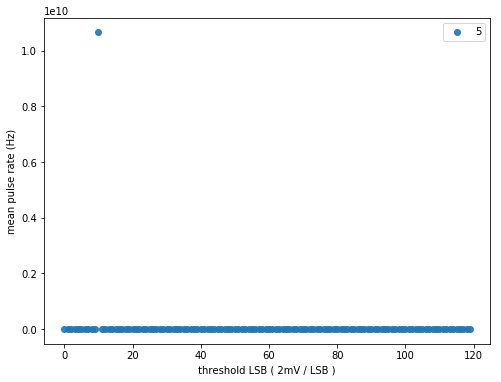

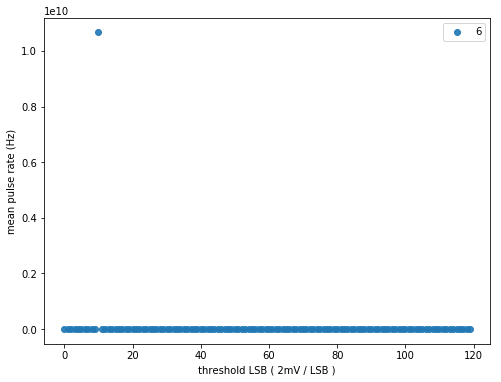

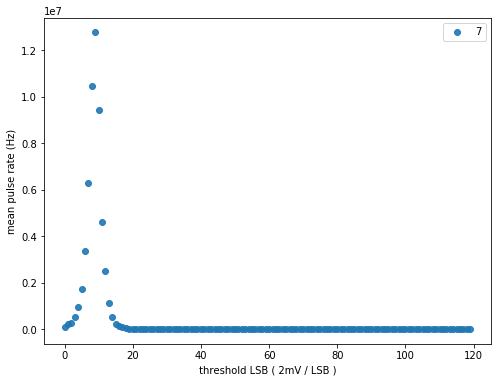

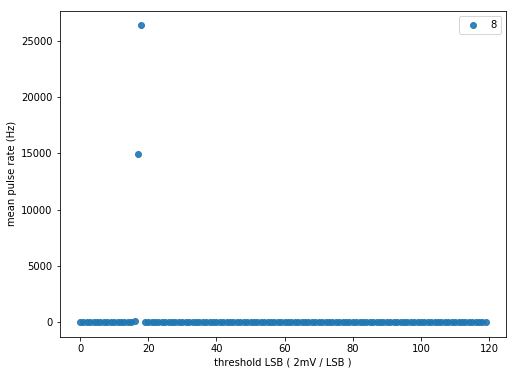

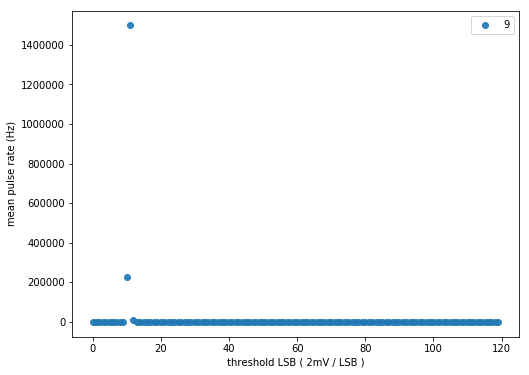

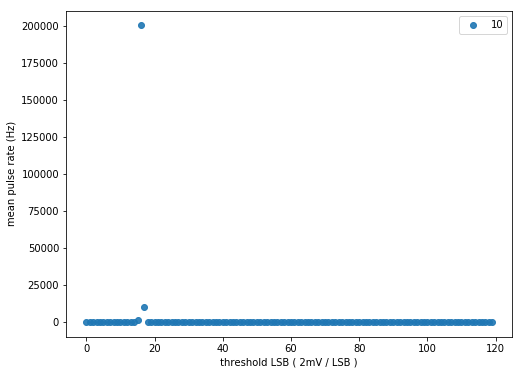

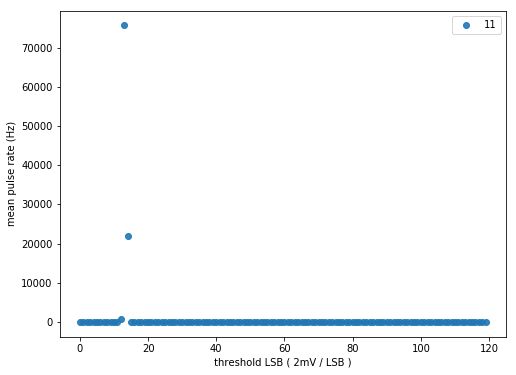

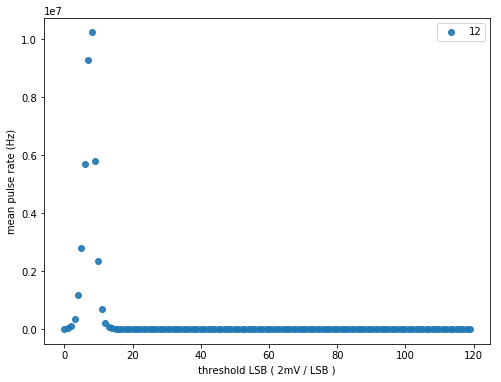

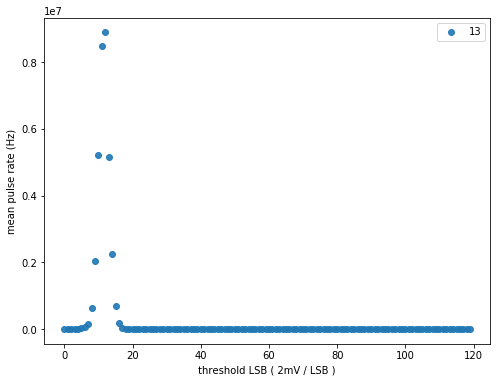

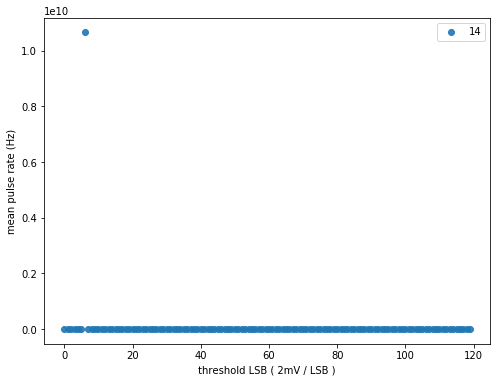

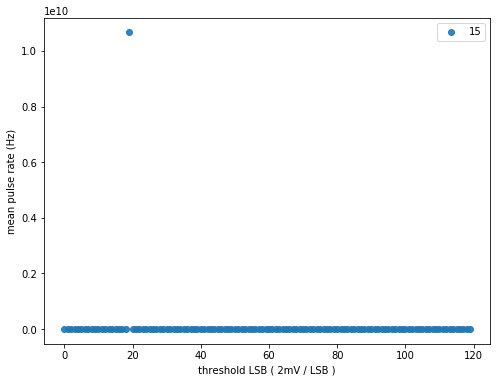

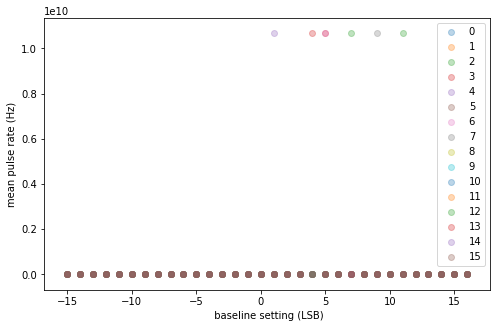

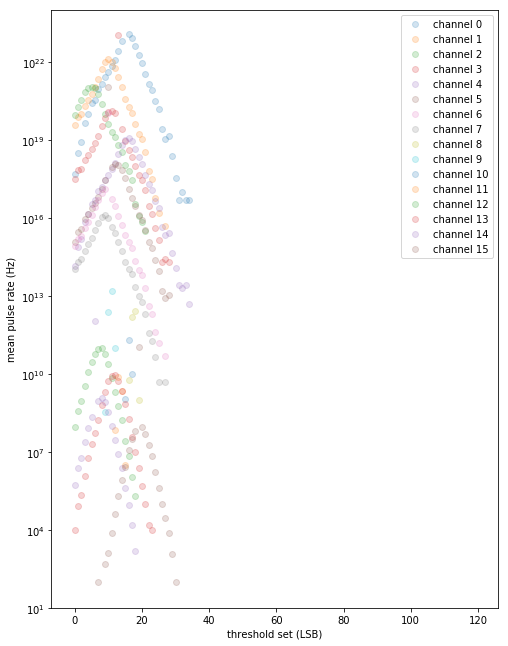

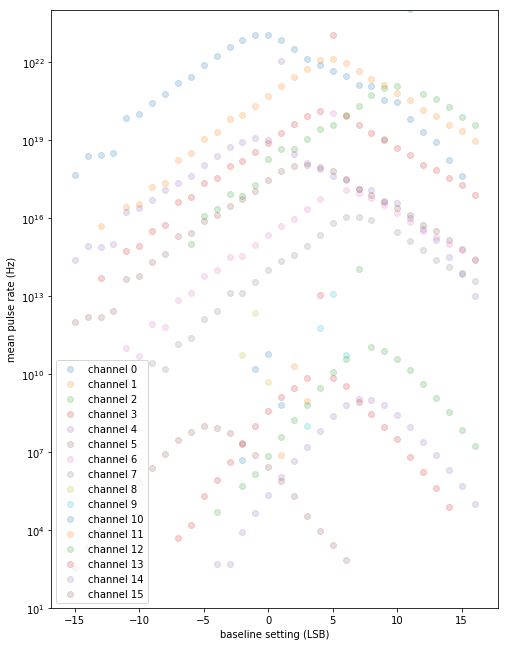

 parallel baseline scan board,  0025


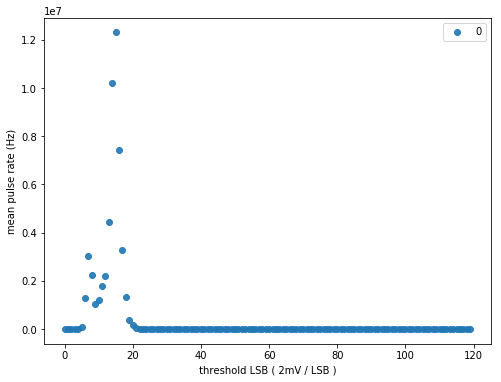

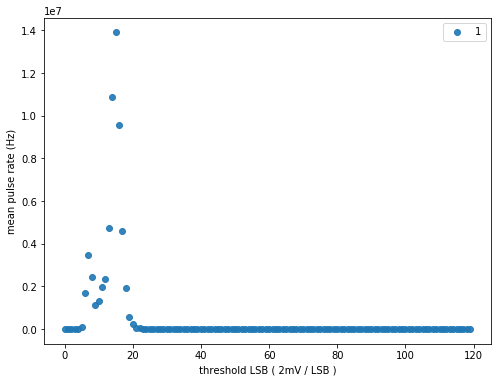

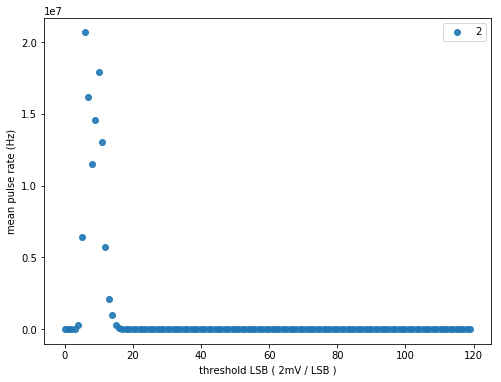

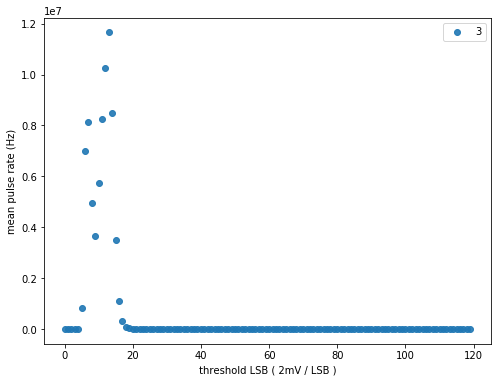

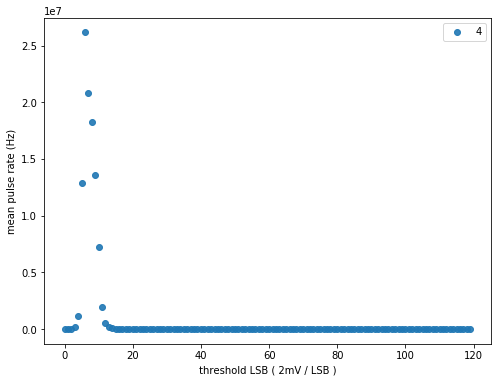

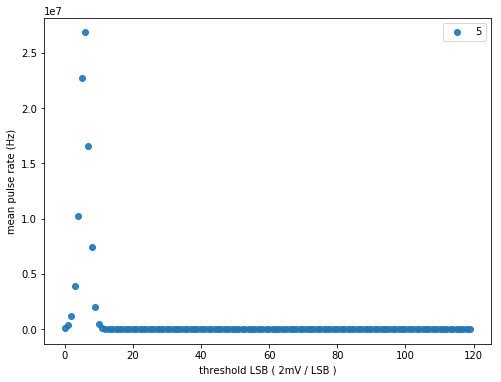

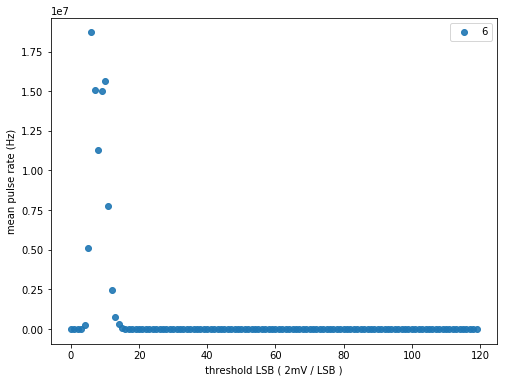

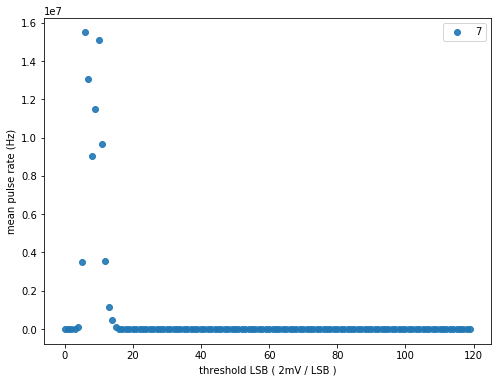

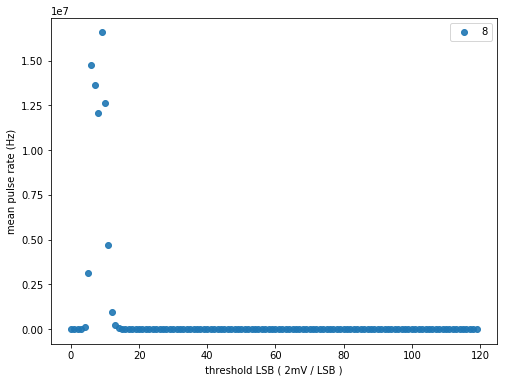

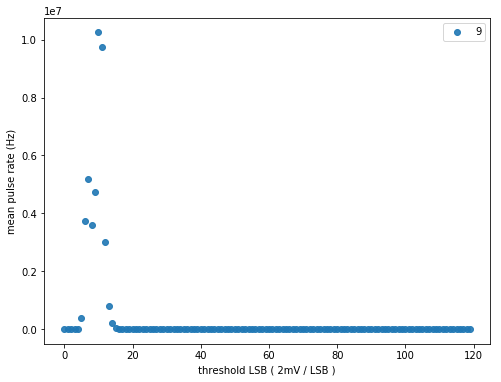

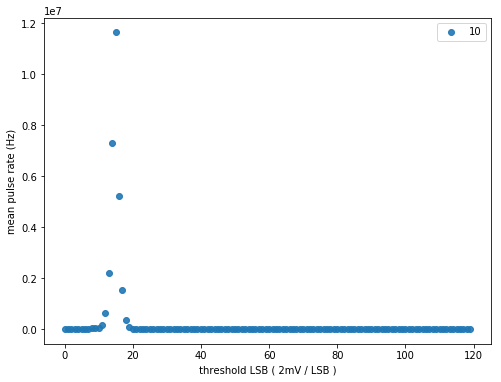

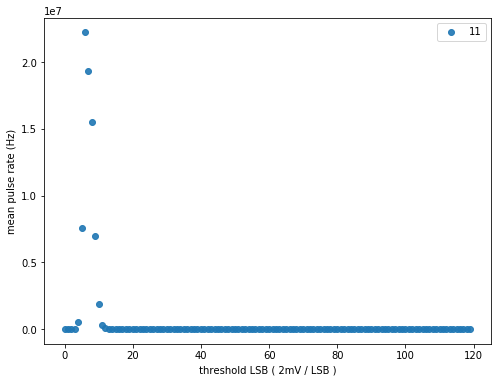

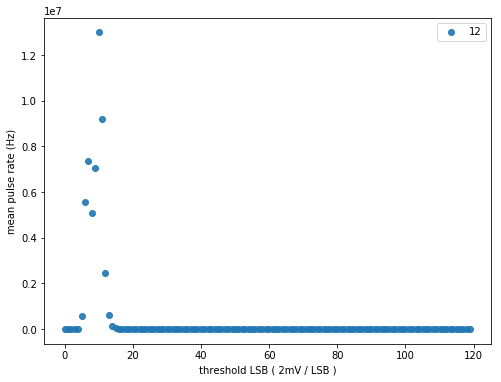

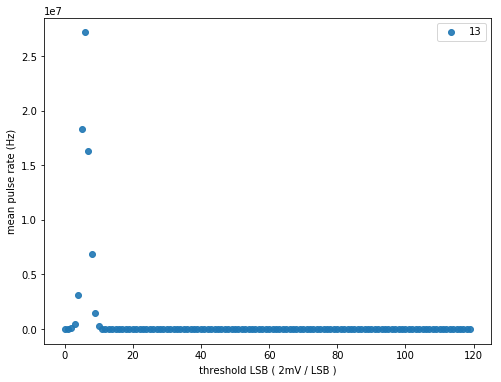

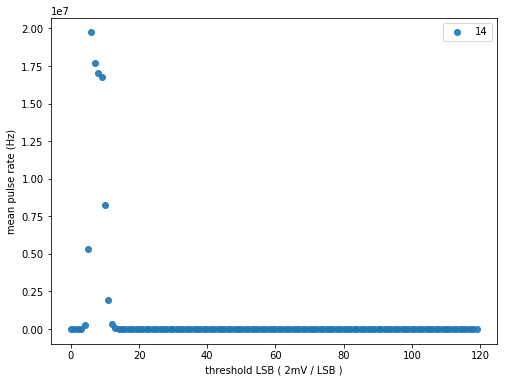

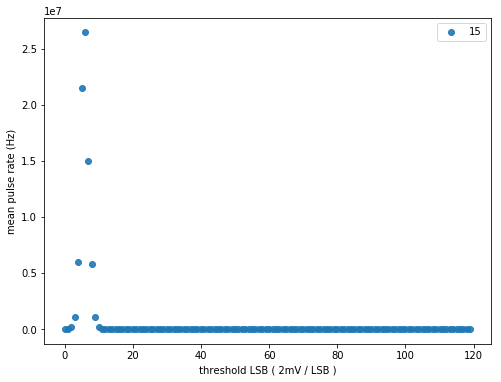

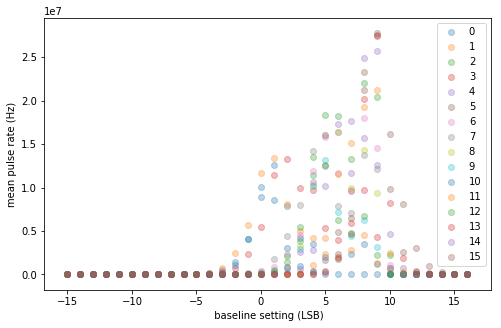

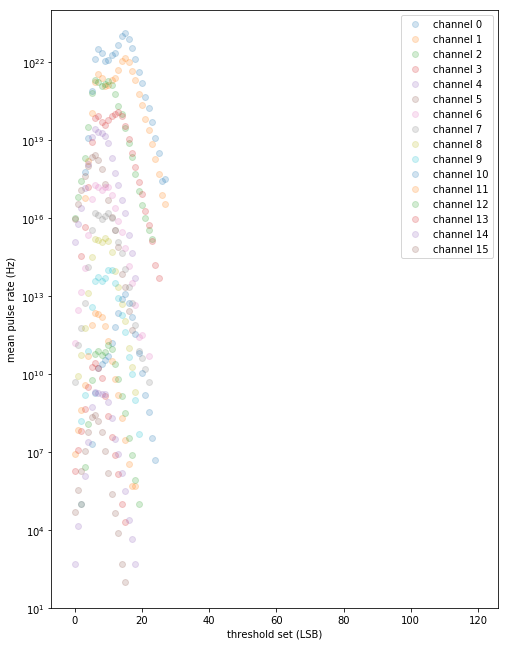

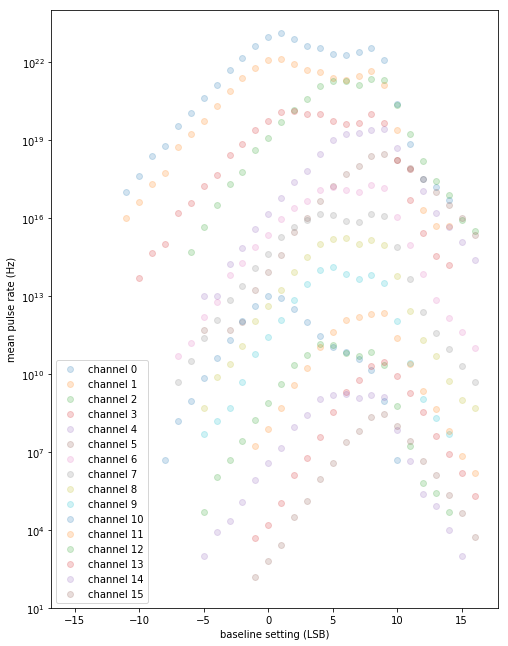

In [4]:
names=[ "0203" , "0204", "0025"]
#names=[ "0201" , "0202",  "0203" , "0204" , "0007"]
for name in names:
    ptc.init_active_boards()  

    print(" parallel baseline scan board, ", name)
    baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=False) 
    baseline_calib.set_baselines_individual(name, [15]*16 )   
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)        
    #read threshold_scan from database:
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

     #plot current scan results for all channels:


    # baseline scan:
    noise_scan_raw = dummy_calib["noise_scan_raw"]
    noise_range    = dummy_calib["bl_range"]

    plt.rcParams["figure.figsize"] = (8,6)
    for i in range(0,16):#
     plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.9,label = "{:d}".format(i))

     plt.legend()
     plt.xlabel(" threshold LSB ( 2mV / LSB ) ")
     plt.ylabel("mean pulse rate (Hz)")
     #plt.yscale('log') 
     plt.show()
    plt.rcParams["figure.figsize"] = (8,5)
    for i in range(0,16):
      plt.scatter(noise_range,noise_scan_raw[i],alpha=0.3,label = "{:d}".format(i))

      plt.legend()
      plt.xlabel("  baseline setting (LSB) ")
      plt.ylabel("mean pulse rate (Hz)")
      #plt.yscale('log') 
    plt.show()
    # staggerd plots:
    plt.rcParams["figure.figsize"] = (8,11)
    for i in range(0,16):
         nums = np.array(tsbl_scan_raw[i])*10**(16-i)
         plt.scatter(tsbl_range,nums,alpha=0.2,label = "channel {:d}".format(i))

         plt.legend()
         plt.xlabel("threshold set (LSB)")
         plt.ylabel("mean pulse rate (Hz)")

    plt.yscale('log') 
    plt.ylim(ymax = 1E24, ymin = 1E1)
    plt.show()

    plt.rcParams["figure.figsize"] = (8,11)
    for i in range(0,16):
         nums = np.array(noise_scan_raw[i])*10**(16-i)
         plt.scatter(noise_range, nums,alpha=0.2,label = "channel {:d}".format(i))

         plt.legend()
         plt.xlabel("baseline setting (LSB)")
         plt.ylabel("mean pulse rate (Hz)")

    plt.yscale('log') 
    plt.ylim(ymax = 1E24, ymin = 1E1)
    plt.show()
ptc.init_active_boards()  

In [3]:
# 